In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0].shape

(32, 32, 3)

In [7]:
Y_train.shape

(50000, 1)

In [8]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
#visualing
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

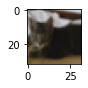

In [10]:
plot_sample(9)

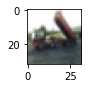

In [11]:
plot_sample(2)

In [12]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

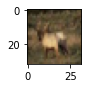

In [13]:
plot_sample(3)

In [14]:
Y_train[3]

array([4], dtype=uint8)

In [15]:
classes[Y_train[3][0]]

'deer'

In [16]:
#scaline
X_train_scale=X_train/255
X_test_scale=X_test/255


In [17]:
#onehot encoding
Y_train_categorical=tf.keras.utils.to_categorical(Y_train,
                                                 num_classes=10,dtype='float32')

In [18]:
Y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
Y_test_categorical=tf.keras.utils.to_categorical(Y_test,
                                                 num_classes=10,dtype='float32')

In [27]:
model=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.Dense(3000,activation='relu'),
        tf.keras.layers.Dense(1000,activation='relu'),
        tf.keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer="SGD",
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])
model.fit(X_train_scale,Y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8131 - accuracy: 0.3519
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6248 - accuracy: 0.4285
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5442 - accuracy: 0.4558
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4813 - accuracy: 0.4786
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4335 - accuracy: 0.4974
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3911 - accuracy: 0.5108
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3531 - accuracy: 0.5248
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3163 - accuracy: 0.5352
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2822 - accuracy: 0.5493
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.253

In [30]:
classes[np.argmax(model.predict(X_test_scale)[1])]


'ship'

In [31]:
classes[Y_test[1][0]]

'ship'

In [32]:
model.evaluate(X_test_scale,Y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.7203 - accuracy: 0.5346


[1.7203460931777954, 0.534600019454956]

In [33]:
#building model
def get_model():
    model=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.Dense(3000,activation='relu'),
        tf.keras.layers.Dense(1000,activation='relu'),
        tf.keras.layers.Dense(10,activation='sigmoid')
])
    model.compile(optimizer="SGD",
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])
    return model


In [34]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model=get_model()
    cpu_model.fit(X_train_scale,Y_train_categorical,epochs=10)

1563/1563 [==============================] - 43s 27ms/step - loss: 1.8143 - accuracy: 0.3543
43.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [35]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=get_model()
    gpu_model.fit(X_train_scale,Y_train_categorical,epochs=10)

1563/1563 [==============================] - 7s 4ms/step - loss: 1.8098 - accuracy: 0.3545
7.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
